## Basics of Data Analysis & Statistical Learning with Python
To start off, I assume everyone here has a basic understanding of the following: 

  * Basic Python syntax
  * Database querying concepts
  * Common understanding of Statistics - Means, Medians, Quartiles

While today we will not be working with a database, it will be useful for working with data in dataframes. I have provided a PDF cheat sheet with useful starting commands for working with pandas dataframes. These basic commands will help you interact with the available data to start to understand what kinds of questions you want to ask of it.

[Pandas cheat sheet](../notebooks/pandas_cheat_sheet.pdf)

**What we will cover today**
  * Reading data into dataframes
  * Basic data exploration
  * Aggregations and visualizations

In [9]:
# command needed for visualizations to function properly
%matplotlib inline

# library for certain data structures and functions
import numpy as np
# library for dataframes composed of numpy arrays
import pandas as pd
# plotting library built on top of matplotlib
import seaborn as sns
# primary python plotting library
import matplotlib.pyplot as plt
# statistics functions
from scipy.stats import norm

### Loading our data
Here I am using  

```python 
pandas.read_csv({ file_location })
```
to load data in from the tmdb 5000 movies csv. Pandas has a number of functions for easily loading in a variety of data structures and file types. 

In [5]:
movies_metadata_df = pd.read_csv('data/tmdb_5000_movies.csv', index_col=None)

### Basic Descriptors
What does the dataframe look like? How many rows and columns are in there? What columns will be most interesting?

As you can see below, our dataframe has 20 columns and just over 4800 rows. Now what do we do?

In [8]:
movies_metadata_df.columns.values

array(['budget', 'genres', 'homepage', 'id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline',
       'title', 'vote_average', 'vote_count'], dtype=object)

In [77]:
movies_metadata_df.shape

(4803, 20)

#### Look at the data of course!

Use this command to see the top number of rows for a dataframe, with the N parameter specifying how many rows you want returned.
```python
DataFrame.head(n={ number of rows you want returned})
```

In [73]:
movies_metadata_df.head(n=5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


### What is intersting in here so far?
This is a sample workflow of analyzing one column within a dataset. Below I will explain my thought process, and we will work through this together. 

The vote average is a performance metric a director, movie critic, or producer would be interested in, so let's start by describing the values present. Afterwards, we will follow a single trace down to better understand the best and worst movies given certain constraints.

In [27]:
movies_metadata_df.vote_average.describe()

count    4803.000000
mean        6.092172
std         1.194612
min         0.000000
25%         5.600000
50%         6.200000
75%         6.800000
max        10.000000
Name: vote_average, dtype: float64

So there were a few movies with a vote average of 10.0. I want to know if I have seen these movies!

In [61]:
movies_metadata_df[movies_metadata_df.vote_average == 10.0]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
3519,0,"[{""id"": 35, ""name"": ""Comedy""}]",NaN,89861,"[{""id"": 131, ""name"": ""italy""}, {""id"": 8250, ""n...",en,Stiff Upper Lips,Stiff Upper Lips is a broad parody of British ...,0.356495,[],"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",1998-06-12,0,99.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Stiff Upper Lips,10.0,1
4045,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",NaN,78373,"[{""id"": 1415, ""name"": ""small town""}, {""id"": 15...",en,"Dancer, Texas Pop. 81","Four guys, best friends, have grown up togethe...",0.376662,"[{""name"": ""HSX Films"", ""id"": 4714}, {""name"": ""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1998-05-01,565592,97.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,in the middle of nowhere they had everything,"Dancer, Texas Pop. 81",10.0,1
4247,1,"[{""id"": 10749, ""name"": ""Romance""}, {""id"": 35, ...",NaN,361505,[],en,Me You and Five Bucks,"A womanizing yet lovable loser, Charlie, a wai...",0.094105,[],[],2015-07-07,0,90.0,[],Released,"A story about second, second chances",Me You and Five Bucks,10.0,2
4662,0,"[{""id"": 35, ""name"": ""Comedy""}]",NaN,40963,"[{""id"": 10183, ""name"": ""independent film""}]",en,Little Big Top,An aging out of work clown returns to his smal...,0.092100,"[{""name"": ""Fly High Films"", ""id"": 24248}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2006-01-01,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Rumored,NaN,Little Big Top,10.0,1


I have definitely not seen any of those movies! What could be going on? How are these movies so highly rated and I have not seen them? Well, luckily we only have 20 columns of data to look at, so you can quickly see that the vote average of those movies is 1-2. Does that have something to do with this?

In [10]:
movies_metadata_df.vote_count.describe()

count     4803.000000
mean       690.217989
std       1234.585891
min          0.000000
25%         54.000000
50%        235.000000
75%        737.000000
max      13752.000000
Name: vote_count, dtype: float64

So at this point, it should be clear that 1-2 votes its a pretty small amount, with the average number of votes being 690, but that standard deviation is really high. Still let's set our threshold at the 25% percentile and see what we find!

In [66]:
movies_metadata_df[movies_metadata_df.vote_count > 54]['vote_average'].describe()

count    3593.000000
mean        6.319816
std         0.838579
min         2.900000
25%         5.800000
50%         6.400000
75%         6.900000
max         8.500000
Name: vote_average, dtype: float64

The highest rated movie here was only 8.5 which seems much more plausible given human nature. Lets go find out what those movies are!

In [86]:
movies_metadata_df[movies_metadata_df.vote_count > 54] \
    .sort_values('vote_average', ascending=False) \
    .head(n=20)[['original_title','vote_average','budget','revenue']]

,original_title,vote_average,budget,revenue
1881,The Shawshank Redemption,8.5,25000000,28341469
3337,The Godfather,8.4,6000000,245066411
3865,Whiplash,8.3,3300000,13092000
1818,Schindler's List,8.3,22000000,321365567
662,Fight Club,8.3,63000000,100853753
2731,The Godfather: Part II,8.3,13000000,47542841
2294,千と千尋の神隠し,8.3,15000000,274925095
3232,Pulp Fiction,8.3,8000000,213928762
3723,Anne of Green Gables,8.2,0,0
1990,The Empire Strikes Back,8.2,18000000,538400000


In [87]:
movies_metadata_df[movies_metadata_df.vote_count > 54] \
    .sort_values('vote_average') \
    .head(n=20)[['original_title','vote_average','budget','revenue']]

,original_title,vote_average,budget,revenue
1652,Dragonball Evolution,2.9,100000000,0
480,Battlefield Earth,3.0,44000000,21400000
2194,Disaster Movie,3.0,25000000,14109284
2237,Alone in the Dark,3.1,20000000,10442808
1265,FearDotCom,3.2,40000000,18902015
2122,Epic Movie,3.2,20000000,86865564
2746,Baby Geniuses,3.3,12000000,36450736
601,Rollerball,3.4,0,0
2003,Jaws: The Revenge,3.5,23000000,51881013
871,Gigli,3.5,54000000,7266209


### What does this mean?
Given what we now know so far about vote count and a lack of rigor around it, we can perform quick test to look at the distribution of vote average with vote count filtered and unfiltered. { insert joke about instagram }

If you look below at the two distributions, while the first one is not the worst fit, it could be better on the lower tail, while the second one looks much more reasonable. If we were wanting to build a predictive model on this outcome vote average, allowing certain data into the model that doesn't meet a particular standard could sway either the predictiveness or its usefulness in what we are trying to do.

**Note:** Just because a model is "predictive" doesn't mean it solves all your problems!

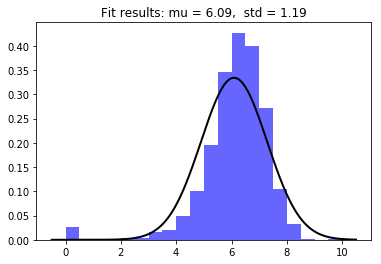

In [43]:
vote_average_data = movies_metadata_df.vote_average
vote_mu, vote_std = norm.fit(vote_average_data)
plt.hist(vote_average_data, bins=20, density=True, alpha=0.6, color='b')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 400)
p = norm.pdf(x, vote_mu, vote_std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (vote_mu, vote_std)
plt.title(title)
plt.show()

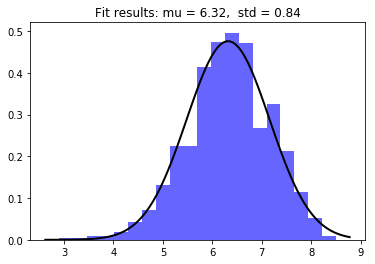

In [42]:
vote_average_data = movies_metadata_df[movies_metadata_df.vote_count > 54].vote_average
vote_mu, vote_std = norm.fit(vote_average_data)
plt.hist(vote_average_data, bins=20, density=True, alpha=0.6, color='b')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, vote_mu, vote_std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (vote_mu, vote_std)
plt.title(title)
plt.show()

### Takeaways
There are some useful things tucked away in all those commands that we will walk through now.

#### Selecting Data
For Pandas dataframes, returning all columnn data is done by either following the dataframe object with a period and selecting the column name, or following the dataframe with brackets. Single brackets is fine for one column and if you want series data, but if you want multiple or another dataframe, it will require two.
```python
dataframe_name.column_name

dataframe_name[['column_name']]
```

To select a row by value, use the iloc or loc function depending on if you want to use the index or not.
```python
dataframe_name.iloc[0]

dataframe_name.loc[5]
```

#### Filtering Data
To select only a subset of data, you can use brackets on the dataframe, followed by a specific condition on the dataframe and column you wish to filter on. Multiple filters can be done in a single bracket or in a pipeline as needed.
```python
dataframe_name[dataframe_name.column_name > arbitrary_value]

dataframe_name[dataframe_name.column_name > arbitrary_value and dataframe_name.other_column_name < greater_value]

dataframe_name[dataframe_name.column_name > arbitrary_value][dataframe_name.other_column_name < greater_value]
```

#### Describing Data
I use the describe function a number of times, for quick aggregate statistics on the values in a column. This is extremely useful for continuous variables as seen above, but for categorical data, value_counts provides a similar usefulness. 
```python
dataframe_name.column_name.describe()

dataframe_name.column_name.value_counts()

# If you wish to not ignore null values
dataframe_name.column_name.value_counts(dropna=False) 
```

#### Sorting Data
This is extremely useful either during data exploration or at the end when you wish to results in a compelling fashion. 
```python 
dataframe_name.sort_values('column_name', ascending=True)
```

#### Grouping and Aggregating Data
Aggregating metrics by certain dimension is done using the groupby function, passing in a series, and then specifying the column and aggregationg you wish to perform after.
```python
dataframe_name.groupby('column_name')['value'].mean()

dataframe_name.groupby(['column_one','column_two'])['value'].sum()
```

#### From Sql to Pandas
**SQL**
```sql
SELECT
    column_name
    , SUM(metric_name) as metric_name
FROM
    table_name
WHERE
    other_column > some value
GROUP BY
    column_name
ORDER BY
    SUM(metric_name) DESC
LIMIT 5
```
**PYTHON PANDAS**
```python
pd.DataFrame(dataframe_name[dataframe_name.other_column > some_value] \
             .groupby('column_name')['metric_name'] \
             .sum()) \
             .sort_values('metric_name', ascending=False) \
             .head(n=5)
```

### Your turn
Explore a thread within this dataset that interests you using some of the methods described above. I am happy to help if you don't have an idea of where to start.